### Data Profiling ###
Some further data profiling action with the newly prepared usage_stats file.

In [2]:
#import libraries
%matplotlib inline
import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium as fo
#import folium.plugins as plugins
import requests
import json
import os

#from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from datetime import datetime, timedelta, timezone
from folium.plugins import HeatMap, MarkerCluster

/anaconda3/envs/geotwo/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [4]:
df_stations = pd.read_csv("../../usage_stats_cleaned_new2.csv")
df_stations.rename(columns = {'StartStation  latitude':'StartStation latitude', 'EndStation  latitude':'EndStation latitude'}, inplace = True)

In [5]:
print(df_stations.count())
df_stations[df_stations["StartStation Id"] == 1].head()

def distance(row):
    """Get distance between pairs of lat-lon points"""
    return geodesic((row["StartStation latitude"], row["StartStation longitude"]), 
                    (row["EndStation latitude"], row["EndStation longitude"])).km

df_stations['distance (geodesic)'] = df_stations.apply(lambda row: distance(row),axis=1)
df_stations.head()


StartStation Id           6643573
Start Date                6643573
EndStation Id             6643573
End Date                  6643573
Duration                  6643573
StartStation Id Used      6643573
EndStation Id Used        6643573
Frequency                 6643573
StartStation Address      6643573
StartStation latitude     6643573
StartStation longitude    6643573
StartStation capacity     6643573
EndStation Address        6643573
EndStation latitude       6643573
EndStation longitude      6643573
EndStation capacity       6643573
dtype: int64


,StartStation Id,Start Date,EndStation Id,End Date,Duration,StartStation Id Used,EndStation Id Used,Frequency,StartStation Address,StartStation latitude,StartStation longitude,StartStation capacity,EndStation Address,EndStation latitude,EndStation longitude,EndStation capacity,distance (geodesic)
0,836,06/09/2018 18:03,749,06/09/2018 18:38,2100,325,49668,1,"York Way, Kings Cross",51.541596,-0.125441,24,"Haggerston Road, Haggerston",51.539329,-0.074285,37,3.558160
1,831,24/07/2018 20:17,638,24/07/2018 20:39,1320,2294,68917,5,"St John's Crescent, Brixton",51.466232,-0.113180,25,"Falcon Road, Clapham Junction",51.466634,-0.169821,28,3.936338
2,831,06/06/2018 09:33,264,06/06/2018 09:56,1380,2294,74294,1,"St John's Crescent, Brixton",51.466232,-0.113180,25,"Tysoe Street, Clerkenwell",51.526443,-0.109257,20,6.704526
3,831,17/09/2018 16:39,638,17/09/2018 17:06,1620,2294,68917,5,"St John's Crescent, Brixton",51.466232,-0.113180,25,"Falcon Road, Clapham Junction",51.466634,-0.169821,28,3.936338
4,831,18/04/2018 08:44,372,18/04/2018 09:12,1680,2294,50130,2,"St John's Crescent, Brixton",51.466232,-0.113180,25,"Sardinia Street, Holborn",51.515208,-0.117863,24,5.458654


In [6]:
#Max distance
print(df_stations.iloc[df_stations["distance (geodesic)"].idxmax()])
#Min distance
df_stations.iloc[df_stations["distance (geodesic)"].idxmin()]

StartStation Id                                    790
Start Date                            02/07/2018 17:18
EndStation Id                                      694
End Date                              02/07/2018 18:28
Duration                                          4200
StartStation Id Used                             23992
EndStation Id Used                               15593
Frequency                                            2
StartStation Address      Stratford Station, Stratford
StartStation latitude                          51.5418
StartStation longitude                        -0.00481
StartStation capacity                               28
EndStation Address         Putney Rail Station, Putney
EndStation latitude                            51.4607
EndStation longitude                         -0.216526
EndStation capacity                                 20
distance (geodesic)                             17.248
Name: 5047163, dtype: object


StartStation Id                                    273
Start Date                            29/07/2017 13:57
EndStation Id                                      819
End Date                              29/07/2017 13:57
Duration                                             0
StartStation Id Used                             75013
EndStation Id Used                               23772
Frequency                                          476
StartStation Address      Belvedere Road 1, South Bank
StartStation latitude                          51.5061
StartStation longitude                       -0.114686
StartStation capacity                               38
EndStation Address        Belvedere Road 2, South Bank
EndStation latitude                            51.5062
EndStation longitude                         -0.114842
EndStation capacity                                 38
distance (geodesic)                          0.0137722
Name: 6105030, dtype: object

In [8]:
#Set list of relevance for plotting rental stations
filter_list = ["EndStation Id",
           "EndStation Id Used",
           "Start Date",
           "End Date",
         #  "StartStation Address",
           "Frequency",
           "EndStation Address",
           "EndStation latitude",
           "EndStation longitude",
           "EndStation capacity",
           "distance (geodesic)"
]
df_startStations = df_stations.drop(filter_list, axis = 1)
#Unique stations
df_startStations.drop_duplicates(subset=("StartStation Id"), keep="first", inplace=True)
print(df_startStations.count())
df_startStations.dropna(0, inplace=True)
df_startStations.head()

StartStation Id           783
Duration                  783
StartStation Id Used      783
StartStation Address      783
StartStation latitude     783
StartStation longitude    783
StartStation capacity     783
dtype: int64


,StartStation Id,Duration,StartStation Id Used,StartStation Address,StartStation latitude,StartStation longitude,StartStation capacity
0,836,2100,325,"York Way, Kings Cross",51.541596,-0.125441,24
1,831,1320,2294,"St John's Crescent, Brixton",51.466232,-0.113180,25
10,805,1500,4153,"Bevington Road, North Kensington",51.520069,-0.206338,27
12,79,1020,4187,"Arundel Street, Temple",51.511726,-0.113856,18
16,474,1020,4260,"Castalia Square, Cubitt Town",51.498125,-0.011457,39


In [9]:
df_startStations["StartStation capacity"] = df_startStations["StartStation capacity"].astype("str")
df_startStations["StartStation Id Used"] = df_startStations["StartStation Id Used"].astype("float64")
df_startStations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 85003
Data columns (total 7 columns):
StartStation Id           783 non-null int64
Duration                  783 non-null int64
StartStation Id Used      783 non-null float64
StartStation Address      783 non-null object
StartStation latitude     783 non-null float64
StartStation longitude    783 non-null float64
StartStation capacity     783 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


In [10]:
#Plot top 10 used rental stations
m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start= 10
)


df_startStations_top = df_startStations.sort_values(by=['StartStation Id Used'], ascending=False)[:1]
#top markers
for index, p in df_startStations_top[['StartStation latitude','StartStation longitude','StartStation capacity', 'StartStation Id Used']].iterrows():
    fo.Marker(
    location=[p['StartStation latitude'], p['StartStation longitude']],
    icon=fo.Icon(color='red'),
    popup="Capacity: " + p['StartStation capacity'] + '</br>' + " Used between 2016 and 2018: " + str(p['StartStation Id Used']),
    ).add_to(m)
    
df_startStations_rest = df_startStations.sort_values(by=['StartStation Id Used'], ascending=False)[1:10]
#rest markers
for index, p in df_startStations_rest[['StartStation latitude','StartStation longitude','StartStation capacity', 'StartStation Id Used']].iterrows():
    fo.Marker(
    location=[p['StartStation latitude'], p['StartStation longitude']],
    icon=fo.Icon(color='green'),
    popup="Capacity: " + p['StartStation capacity'] + '</br>' + " Used between 2016 and 2018: " + str(p['StartStation Id Used']),
    ).add_to(m)
    
    
# Circle marker
fo.CircleMarker([51.509865, -0.118092],
                    radius=10,
                    popup='Centroid',
                    color='darkred',
                    fill_opacity=0.2
                    ).add_to(m)


#For Normalizing reasons
max_amount = float(df_startStations['StartStation Id Used'].max())

hm_wide = HeatMap(list(zip(df_startStations["StartStation latitude"].values, df_startStations["StartStation longitude"].values, df_startStations["StartStation Id Used"].values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=8, 
                 )

hm_wide.add_to(m)
m.save(outfile= "most_stations.html")
m

#### Plotting Routes ####
* Routes between StartStation and EndStation with Graphhopper API (n to m relation)
* Use time data (departure and arrival times) of each station for switching between day and night cycle

In [11]:
df_stations.info()
###Same startstation id and endstation id combination = frequency of used route

#df_routes["Frequency"] = df_stations.groupby(by=["StartStation Id", "EndStation Id"]).count().reset_index()["Duration"]
df_routes = df_stations.copy(True)
print("\nMost traveled route: ")
print(df_routes.iloc[df_routes["Frequency"].idxmax()])
#Remove double startstation and endstation 
df_routes = df_routes.drop_duplicates(subset=("StartStation Id", "EndStation Id"), keep='first')

#Save route endpoints
df_routes.to_csv(r"C:\Users\Pascal\Desktop\Cycles_Cleaned\routes_cleaned.csv", index=None, header=True)
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643573 entries, 0 to 6643572
Data columns (total 17 columns):
StartStation Id           int64
Start Date                object
EndStation Id             int64
End Date                  object
Duration                  int64
StartStation Id Used      int64
EndStation Id Used        int64
Frequency                 int64
StartStation Address      object
StartStation latitude     float64
StartStation longitude    float64
StartStation capacity     int64
EndStation Address        object
EndStation latitude       float64
EndStation longitude      float64
EndStation capacity       int64
distance (geodesic)       float64
dtypes: float64(5), int64(8), object(4)
memory usage: 861.7+ MB

Most traveled route: 
StartStation Id                                           307
Start Date                                25/12/2015 11:21:00
EndStation Id                                             404
End Date                                  25/12/2015 14:

In [12]:
#Optional, read routes from checkpoint
df_routes = pd.read_csv("routes_cleaned.csv")
df_routes.info()
#display(df_routes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470190 entries, 0 to 470189
Data columns (total 17 columns):
StartStation Id           470190 non-null int64
Start Date                470190 non-null object
EndStation Id             470190 non-null int64
End Date                  470190 non-null object
Duration                  470190 non-null int64
StartStation Id Used      470190 non-null int64
EndStation Id Used        470190 non-null int64
Frequency                 470190 non-null int64
StartStation Address      470190 non-null object
StartStation latitude     470190 non-null float64
StartStation longitude    470190 non-null float64
StartStation capacity     470190 non-null int64
EndStation Address        470190 non-null object
EndStation latitude       470190 non-null float64
EndStation longitude      470190 non-null float64
EndStation capacity       470190 non-null int64
distance (geodesic)       470190 non-null float64
dtypes: float64(5), int64(8), object(4)
memory usage: 61.0+

In [13]:
# graphhopper API (Plotting folium map)
endpoint = 'http://i-hadoop-04.informatik.hs-ulm.de:11111/route?'
point = 'point='
urlEnd = '&locale=de&vehicle=bike&weighting=fastest&elevation=false&use_miles=false&type=json&points_encoded=false'

m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start=12,
    prefer_canvas=True,
    tiles='CartoDB dark_matter' #to see the routes better
)

#Marker cluster for performance
marker_cluster = MarkerCluster().add_to(m)

for index, p in df_routes[['StartStation latitude','StartStation longitude', 'EndStation latitude', 
                           'EndStation longitude', 'StartStation Address', 'EndStation Address', 
                           "Frequency"]][:1000].iterrows(): #problem map will be slow

    startX = str(p["StartStation latitude"])
    startY = str(p["StartStation longitude"])
    endX = str(p["EndStation latitude"])
    endY = str(p["EndStation longitude"])
    sname = str(p["StartStation Address"])
    ename = str(p["EndStation Address"])
    freq = p["Frequency"]

    try:
        r = requests.get(endpoint + point + startX + ',' + startY + '&' + point + endX + ',' + endY + urlEnd)
        #r = requests.get('http://i-nominatim-01.informatik.hs-ulm.de:11111/route?point=51.131,12.414&point=48.224,3.867&vehicle=bike&locale=de&type=json&points_encoded=false')
        r.json()
    except Exception:
        print("Something went wrong " + str(r.status_code))

    # Get list of waypoint coordinates
    inversed_coordinates = r.json()['paths'][0]['points']['coordinates']
    inversed_coordinates

    # folium
    coordinates = [(x, y) for (y, x) in inversed_coordinates]
    fo.features.PolyLine(coordinates, weight=(freq - df_routes["Frequency"].mean())/df_routes["Frequency"].std(),
                      #  opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min()),
                         popup="Used between 2016 and 2018: " + str(int(p["Frequency"])) + "x", opacity = 1).add_to(m)
    #y = (x - mean) / standard_deviation  (Standardization)
    #y = (x - min) / (max - min)  (Normalization)


#Add markers (unique)
df_startStations[:len(df_startStations)].apply(lambda row:fo.Marker(location=[row["StartStation latitude"], 
                                                  row["StartStation longitude"]],
                                                  popup=row['StartStation Address'],
                                                  icon=fo.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster),axis=1)
m.save(outfile= "routes_stations.html")
m

NameError: name 'r' is not defined

In [14]:
def CreateUrl(frame, limit):
        """Creating the URL for each individual route"""

        endpoint = 'http://i-hadoop-04.informatik.hs-ulm.de:11111/route?'
        point = 'point='
        urlEnd = '&locale=de&vehicle=bike&weighting=fastest&elevation=false&use_miles=false&type=json&points_encoded=false'

        url_liste = pd.DataFrame(columns={"URL", "Frequency"})
        #url_list_routes = []

        for index, p in df_routes[['StartStation latitude','StartStation longitude', 'EndStation latitude', 
                           'EndStation longitude', 'Frequency'
                          ]][:limit].iterrows():

                startX = str(p["StartStation latitude"])
                startY = str(p["StartStation longitude"])
                endX = str(p["EndStation latitude"])
                endY = str(p["EndStation longitude"])
                freq = str(p["Frequency"])
                try:
                    url = endpoint + point + startX + ',' + startY + '&' + point + endX + ',' + endY + urlEnd
                    url_liste = url_liste.append({'URL' : url , 'Frequency' : freq} , ignore_index=True)
                    
                except Exception:
                    print("Something went wrong")
        return url_liste



#### Weather Data ####

>Requesting weather api for getting local based weather data. <br>
Darksky Weather API 1000 requests per day. Be careful with that limitation.


In [15]:
### Read weather data for London with darksky api (1000 requests per day)
df_dates = pd.read_csv("dates.csv")
df_dates['Start Date'].replace('\.','/',inplace=True, regex=True)
df_dates.head()
#old api_key = #"f55c6080da9427e96339ae16c9ddc595"
api_key = "f8e9c2381b3c16decc0f5b06fbe1e324"
df_dates["Daily Weather"] = ""
df_dates["Hourly Weather"] = ""

for index, p in df_dates.iterrows():
    timestamp = str(int(datetime.strptime(df_dates["Start Date"][index], '%d/%m/%Y'
                             ).replace(tzinfo=timezone.utc).timestamp()))
    weather_resp = requests.get('https://api.darksky.net/forecast/'+api_key+'/51.509865,-0.118092,'+timestamp+'?exclude=currently,flags,minutely')
    df_dates["Daily Weather"].iloc[index] = weather_resp.json()['daily']['data'][0].get('icon', 'No weather data')
    df_dates["Hourly Weather"].iloc[index] = weather_resp.json()['hourly']['data']
    
df_dates.head()
df_dates.to_csv("dates and weather_new.csv", index=None, header=True)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# merge dataframe to origin back
df_r = df_routes.copy(True)
df_r["Start Date"] = df_r["Start Date"].str[:10]
df_w = pd.read_csv("dates and weather_new.csv", sep=";")
df_w['Start Date'].replace('\.','/',inplace=True, regex=True)
df_t = pd.merge(df_r, df_w, on="Start Date", how='left')
df_routes = pd.concat([df_routes, df_t[["Daily Weather", "Hourly Weather"]]], axis=1)
df_routes.head(10)

#### Get Graphhopper waypoints ####

>Requesting graphhopper server for fetching route coordinates. Using asynchronous remote procedure calls. (Takes around 4 hours to request all routes).


In [ ]:
import asyncio
import requests
import json
from aiohttp import ClientSession
from datetime import datetime
from pprint import pprint

#limit for routes (test reasons)
limit = len(df_routes)
#Create df of urls
url_df = CreateUrl(df_routes, limit)
#Create empty df for distinction (otherwise the whole list will be plotted as one single line)
df_empty = pd.DataFrame(index=np.arange(0, 1), columns=('lon', 'lat', 'frequency'))
#list for coordinates of waypoints
df_waypoints = []


async def get_data(session, url, freq, i):
    start_time = datetime.now()
    try:
        async with session.get(url) as resp:
            r = await resp.json()
            coord = r['paths'][0]['points']['coordinates']
            df_journey = pd.DataFrame(coord[:], columns=['lon', 'lat'])
            df_journey['frequency'] = freq
            df_journey = df_journey.append(df_empty)
            df_waypoints.append(df_journey)
    except Exception as e:
        print("running %d" % i, e)


async def boundary(sem, session, url, freq, i):
    async with sem:
        await get_data(session, url, freq, i)


async def run(num):
    tasks = []
    sem = asyncio.Semaphore(10000)
    async with ClientSession() as session:
        for i in range(num):
            task = asyncio.ensure_future(boundary(sem, session, str(url_df['URL'][i]), url_df['Frequency'][i], i))
            tasks.append(task)
        responses = asyncio.gather(*tasks)
        await responses
        

start = datetime.now()
#loop = asyncio.get_event_loop()
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)
#future = asyncio.ensure_future(run_login(number))
loop.run_until_complete(run(limit))
loop.close()

routes_complete = pd.concat(df_waypoints, ignore_index=True)
routes_complete.to_csv('all_id_routes.csv', header=True, index=None)

print(routes_complete.shape)
routes_complete.loc[2:15]

In [ ]:
##Checkpoint
routes_complete = pd.read_csv("all_id_routes.csv")

In [ ]:
pd.set_option('display.max_rows', 100)
routes_complete.info()
routes_complete = routes_complete.astype({"frequency": float})

In [ ]:
routes_complete.head()

#### New round with plotting routes (folium) ####
> Take only unique waypoints and ignore routes that has only been used 1 time
___TODO:___ Add timeslider


In [ ]:
#Time Slider
#Datentypen überprüfen
#Zeiten extrahieren, dass nur noch die Zeiten da stehen
#Granularität auf Stunde
#Benötigt StartStation/EndStation Timestamps

In [ ]:
liste = []
lis = []
for index, p in routes_complete[:100].iterrows():
    startX = p["lat"]
    startY = p["lon"]
    if (startX == 0):
            liste.append([lis, [freq]])        
            lis = []

    else:
        freq = int(p["frequency"])
        lis.append((startX, startY))

liste[0][1]

In [ ]:
%%time
len(liste)
for index, p in routes_complete.iterrows():
    h = 2
print(h)

In [ ]:
routes_complete.loc[(routes_complete["frequency"]==1)].count()
#remove values with frequency 2 or less
#maybe only top 20%
#try to plot only unique ones

In [ ]:
routes_complete[["lat", "lat"]].nunique()

In [ ]:
#%%time
m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start=12,
    prefer_canvas=True,
    tiles='CartoDB dark_matter' #to see the routes better
)


liste = []
routes_complete.fillna(0, inplace=True)
freq_mean = routes_complete["frequency"].mean()
freq_std = routes_complete["frequency"].std()
freq_min = routes_complete["frequency"].min()
freq_max = routes_complete["frequency"].max()

#opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min())

for index, p in routes_complete[:10000].iterrows():
    startX = p["lat"]
    startY = p["lon"]
    if (startX == 0):
            fo.PolyLine(liste, weight=(freq - freq_mean)/freq_std, opacity=-1*(freq-freq_mean)/(freq_std),
                                 popup="Used between 2016 and 2018: " + str(int(freq)) + "x"
                                 ,color="red").add_to(m)
            liste = []
            #print(-1*(freq-freq_mean)/(freq_std))
    else:
            freq = int(p["frequency"])
            liste.append((startX, startY))


m

In [ ]:
coordinates
 # Get list of waypoint coordinates
    inversed_coordinates = r.json()['paths'][0]['points']['coordinates']
    inversed_coordinates

    # folium
    coordinates = [(x, y) for (y, x) in inversed_coordinates]
    fo.features.PolyLine(coordinates, weight=(freq - df_routes["Frequency"].mean())/df_routes["Frequency"].std(),
                      #  opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min()),
                         popup="Used between 2016 and 2018: " + str(freq) + "x", opacity = 1).add_to(m)
    #y = (x - mean) / standard_deviation  (Standardization)
    #y = (x - min) / (max - min)  (Normalization)


#Add markers (unique)
df_startStations[:len(df_startStations)].apply(lambda row:fo.Marker(location=[row["StartStation latitude"], 
                                                  row["StartStation longitude"]],
                                                  popup=row['StartStation Address'],
                                                  icon=fo.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster),axis=1)
m.save(outfile= "routes_stations.html")
m

#### Borough Shape ####
> ___TODO:___ Divide the stations into districts/boroughs 

In [ ]:
#Read ward shape file
london_gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
#read cycleroutes shape file
gpd_cycleroutes = gpd.read_file("CycleRoutes_Cleaned.shp")
gpd_cycleroutes.head()

#Plot choropleth
f, ax = plt.subplots(1,figsize=(20, 20))
gpd_cycleroutes.plot(ax = ax, cmap="viridis", alpha=1, legend=True)
london_gdf.to_crs(epsg="4326").plot(ax=ax)

f, ax = plt.subplots(1, figsize=(10,8))
gpd_cycleroutes.plot(ax = ax, cmap="viridis", alpha=1, legend=True)
plt.title("CycleRoutes TFL")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

london_gdf.head()

##### Clustering ###

In [143]:
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.cluster import  KMeans

variables = ['StartStation latitude', 'StartStation longitude', 'StartStation Id Used']
df = df_startStations[variables]
df.head()

,StartStation latitude,StartStation longitude,StartStation Id Used
0,51.541596,-0.125441,325.0
1,51.466232,-0.113180,2294.0
10,51.520069,-0.206338,4153.0
12,51.511726,-0.113856,4187.0
16,51.498125,-0.011457,4260.0


In [17]:
df_scaled = pd.DataFrame(scale(df[["StartStation latitude", "StartStation longitude"]]), index=df.index, columns={"StartStation latitude", "StartStation longitude"}).rename(lambda x: str(int(x)))
X = df_scaled.values
X[:5]

array([[ 1.76149522,  0.0539325 ],
       [-1.96150697,  0.27598064],
       [ 0.69807623, -1.4110607 ],
       [ 0.28590906,  0.26373852],
       [-0.38598405,  2.11812004]])

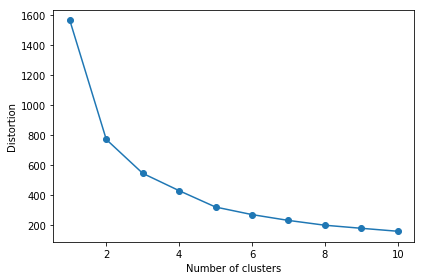

In [168]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                    init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [138]:
km = KMeans(n_clusters=8, 
            init='k-means++',
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
kmcls= km.fit(X)
y_km = km.fit_predict(X)

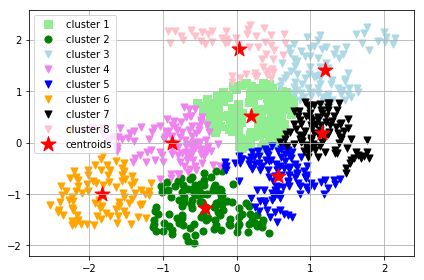

In [139]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='green', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(X[y_km==3,0], 
            X[y_km==3,1], 
            s=50, 
            c='violet', 
            marker='v', 
            label='cluster 4')
plt.scatter(X[y_km==4,0], 
            X[y_km==4,1], 
            s=50, 
            c='blue', 
            marker='v', 
            label='cluster 5')
plt.scatter(X[y_km==5,0], 
            X[y_km==5,1], 
            s=50, 
            c='orange', 
            marker='v', 
            label='cluster 6')
plt.scatter(X[y_km==6,0], 
            X[y_km==6,1], 
            s=50, 
            c='black', 
            marker='v', 
            label='cluster 7') 
plt.scatter(X[y_km==7,0], 
            X[y_km==7,1], 
            s=50, 
            c='pink', 
            marker='v', 
            label='cluster 8') 
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids') 

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

In [21]:
labeled = df.assign(cluster=kmcls.labels_)
labeled.head()

,StartStation latitude,StartStation longitude,StartStation Id Used,cluster
0,51.541596,-0.125441,325.0,4
1,51.466232,-0.113180,2294.0,6
10,51.520069,-0.206338,4153.0,7
12,51.511726,-0.113856,4187.0,0
16,51.498125,-0.011457,4260.0,2


##### Statistics ####
> ___TODO:___ Add further histogram plots based on weather data (e.g. do more people use bicycles when it rains or when the sun shines?...) Also the histogram plot for usage should be updated (x = Station ID, y = Usage) or (x = StartStation ID and EndStation ID, y= frequency).

In [22]:
df_startStations.head()

,StartStation Id,Duration,StartStation Id Used,StartStation Address,StartStation latitude,StartStation longitude,StartStation capacity
0,836,2100,325.0,"York Way, Kings Cross",51.541596,-0.125441,24
1,831,1320,2294.0,"St John's Crescent, Brixton",51.466232,-0.113180,25
10,805,1500,4153.0,"Bevington Road, North Kensington",51.520069,-0.206338,27
12,79,1020,4187.0,"Arundel Street, Temple",51.511726,-0.113856,18
16,474,1020,4260.0,"Castalia Square, Cubitt Town",51.498125,-0.011457,39


In [140]:

variables = ['StartStation Id Used']  #'cluster'
Id = df_startStations['StartStation Id']
df_usage = labeled[variables]
df_usage= pd.concat([Id,df_usage], axis=1)
X_usage = df_usage.values
df_usage.head()

array([[  836.,   325.],
       [  831.,  2294.],
       [  805.,  4153.],
       ...,
       [  468., 12549.],
       [  788., 21724.],
       [  707., 51428.]])

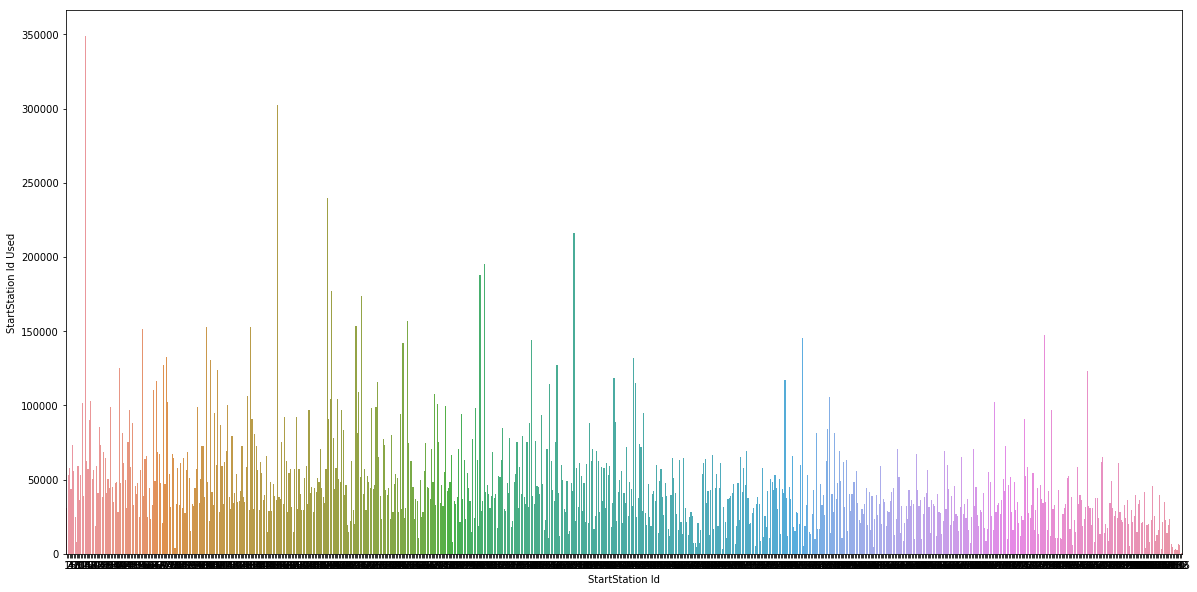

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x="StartStation Id", y="StartStation Id Used", data=df_usage)

In [150]:
df_top = df_startStations.sort_values(by=['StartStation Id Used'], ascending=False)[:10]
#sns.barplot(x="StartStation Id", y="StartStation Id Used", data=df_top)
df_top

,StartStation Id,Duration,StartStation Id Used,StartStation Address,StartStation latitude,StartStation longitude,StartStation capacity
67600,14,1020,348832.0,"Belgrove Street , King's Cross",51.529944,-0.123617,48
33721,154,1020,302205.0,"Waterloo Station 3, Waterloo",51.503792,-0.112824,35
33637,191,1020,239846.0,"Hyde Park Corner, Hyde Park",51.503118,-0.153521,28
33550,374,1020,216203.0,"Waterloo Station 1, Waterloo",51.504028,-0.113864,36
33154,307,1016,195532.0,"Black Lion Gate, Kensington Gardens",51.509908,-0.187843,24
67016,303,1020,187786.0,"Albert Gate, Hyde Park",51.502954,-0.158456,28
33103,194,1020,176990.0,"Hop Exchange, The Borough",51.504628,-0.091774,56
32831,217,1002,173878.0,"Wormwood Street, Liverpool Street",51.516155,-0.082422,16
32773,251,1020,156569.0,"Brushfield Street, Liverpool Street",51.518908,-0.079249,34
32621,213,1020,153195.0,"Wellington Arch, Hyde Park",51.502740,-0.149569,36


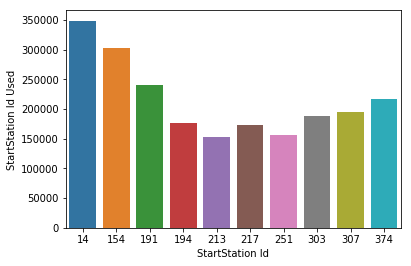

In [152]:
sns.barplot(x="StartStation Id", y="StartStation Id Used", data=df_top)

In [153]:

df_stations.columns = df_stations.columns.str.replace(' ', '_')
df = pd.DataFrame(df_stations.Start_Date.str.split(' ',1).tolist(),
                                   columns = ['Date','time']).drop(columns=['time'])
df.head()

,Date
0,06/09/2018
1,24/07/2018
2,06/06/2018
3,17/09/2018
4,18/04/2018


In [ ]:
dfs=pd.concat([df_stations,df], axis=1).sort_values(by=['Date'])

In [129]:
cols= ['StartStation_Id', 'Date', 'Start_Date', 'EndStation_Id', 'End_Date',
       'Duration', 'StartStation_Id_Used', 'EndStation_Id_Used',
       'Frequency', 'StartStation_Address', 'StartStation_latitude',
       'StartStation_longitude', 'StartStation_capacity',
       'EndStation_Address', 'EndStation_latitude',
       'EndStation_longitude', 'EndStation_capacity',
       'distance_(geodesic)']
dfs[cols].head()

,StartStation_Id,Date,Start_Date,EndStation_Id,End_Date,Duration,StartStation_Id_Used,EndStation_Id_Used,Frequency,StartStation_Address,StartStation_latitude,StartStation_longitude,StartStation_capacity,EndStation_Address,EndStation_latitude,EndStation_longitude,EndStation_capacity,distance_(geodesic)
1277499,641,01/01/2016,01/01/2016 15:07:00,126,01/01/2016 16:00:00,3180,36555,73721,11,"Archbishop's Park, Waterloo",51.498242,-0.117496,23,"Museum of London, Barbican",51.517821,-0.096497,52,2.621258
2286286,73,01/01/2016,01/01/2016 17:51:00,465,01/01/2016 18:23:00,1920,132450,54551,1917,"Old Street Station, St. Luke's",51.525726,-0.088486,37,"Pitfield Street North,Hoxton",51.535580,-0.082490,28,1.172628
1507751,296,01/01/2016,01/01/2016 15:06:00,111,01/01/2016 15:44:00,2280,35913,85949,63,"Knaresborough Place, Earl's Court",51.493632,-0.190603,18,"Park Lane , Hyde Park",51.510017,-0.157276,28,2.946008
1507749,296,01/01/2016,01/01/2016 15:07:00,111,01/01/2016 15:44:00,2220,35913,85949,63,"Knaresborough Place, Earl's Court",51.493632,-0.190603,18,"Park Lane , Hyde Park",51.510017,-0.157276,28,2.946008
5384155,430,01/01/2016,01/01/2016 20:58:00,696,01/01/2016 21:29:00,1860,24667,27926,25,"South Parade, Chelsea",51.489020,-0.175240,18,"Charing Cross Hospital, Hammersmith",51.487285,-0.217996,21,2.976027


In [167]:

# WEATHER DATA

# Usage data from  01/01/2016 to 31/12/2017      # 643573 entries
# Weather data  from 04/01/2015 to 25/09/2018    # 1325 entries

ds = pd.read_csv("raw_files/dates and weather_new.csv", sep= ';')  
f = ds.rename(columns={'Start Date': 'Date'})
f['Date'] =  pd.to_datetime(f['Date'],  format='%d.%m.%Y')
f['Date'] = f['Date'].dt.strftime('%d/%m/%Y')
f.head()



,Date,Daily Weather,Hourly Weather
0,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud..."
1,05/01/2015,partly-cloudy-day,"[{'time': 1420416000, 'summary': 'Mostly Cloud..."
2,06/01/2015,partly-cloudy-day,"[{'time': 1420502400, 'summary': 'Overcast', '..."
3,07/01/2015,partly-cloudy-night,"[{'time': 1420588800, 'summary': 'Clear', 'ico..."
4,08/01/2015,rain,"[{'time': 1420675200, 'summary': 'Mostly Cloud..."


In [164]:
s=pd.merge(f,dfs)
s.head()  

,Date,Daily Weather,Hourly Weather,StartStation_Id,Start_Date,EndStation_Id,End_Date,Duration,StartStation_Id_Used,EndStation_Id_Used,Frequency,StartStation_Address,StartStation_latitude,StartStation_longitude,StartStation_capacity,EndStation_Address,EndStation_latitude,EndStation_longitude,EndStation_capacity,distance_(geodesic)
0,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud...",7,04/01/2015 09:57,233,04/01/2015 10:27,1800,24968,91675,15,"Charlbert Street, St. John's Wood",51.534300,-0.168074,16,"Pall Mall East, West End",51.507770,-0.130700,22,3.929603
1,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud...",734,04/01/2015 15:00,638,04/01/2015 15:43,2580,16223,68917,93,"Plough Terrace, Clapham Junction",51.462306,-0.175407,31,"Falcon Road, Clapham Junction",51.466634,-0.169821,28,0.618538
2,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud...",483,04/01/2015 19:27,33,04/01/2015 19:52,1500,42068,45099,766,"Albert Gardens, Stepney",51.513280,-0.047784,33,"Central House, Aldgate",51.515600,-0.070056,18,1.567489
3,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud...",107,04/01/2015 15:59,695,04/01/2015 16:48,2940,94994,95446,1127,"Finsbury Leisure Centre, St. Luke's",51.526008,-0.096318,20,"Islington Green, Angel",51.536384,-0.102758,21,1.237900
4,04/01/2015,fog,"[{'time': 1420329600, 'summary': 'Partly Cloud...",457,04/01/2015 13:32,462,04/01/2015 14:12,2400,64387,59199,728,"Castlehaven Road, Camden Town",51.542138,-0.145393,29,"Bonny Street, Camden Town",51.541603,-0.138853,45,0.457612


In [154]:

ss = s[['Date', 'Daily Weather']]
d= ss.groupby(["Daily Weather"]).Date.nunique()
d=d.sort_values(ascending=True)
d

Daily Weather
cloudy                   1
clear-day               40
fog                     79
partly-cloudy-night    142
rain                   172
partly-cloudy-day      892
Name: Date, dtype: int64

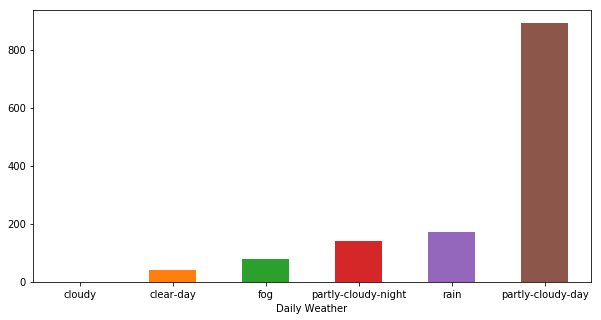

In [155]:
plt.figure(figsize=(10,5))
d.plot(kind='bar', rot=0)

In [183]:
gb = s[['Daily Weather','Frequency']]
gbs= gb.groupby(["Daily Weather"]).sum()
#gbs['index'] = range(1, len(gbs) + 1)
gbs = gbs.reset_index()
gbs = gbs.rename(columns={'Frequency': 'Ride_Frequency'})
gbs.head()

,Daily Weather,Ride_Frequency
0,clear-day,85729623
1,cloudy,664146
2,fog,91514862
3,partly-cloudy-day,1125291148
4,partly-cloudy-night,138089664


In [184]:
#gbs.merge( d.to_frame() , left_index=True, right_index=True)
#df.merge(s.to_frame(), left_index=True, right_index=True)
f = pd.merge(gbs,d.to_frame(), how='inner', on="Daily Weather")
f = f.rename(columns={'Date': 'Days'})

In [186]:
f['Ratio'] = f['Ride_Frequency']/f['Days']
f= f.sort_values(by=['Ratio'], ascending=False)
f

,Daily Weather,Ride_Frequency,Days,Ratio
0,clear-day,85729623,40,2.143241e+06
3,partly-cloudy-day,1125291148,892,1.261537e+06
2,fog,91514862,79,1.158416e+06
4,partly-cloudy-night,138089664,142,9.724624e+05
5,rain,149469584,172,8.690092e+05
1,cloudy,664146,1,6.641460e+05


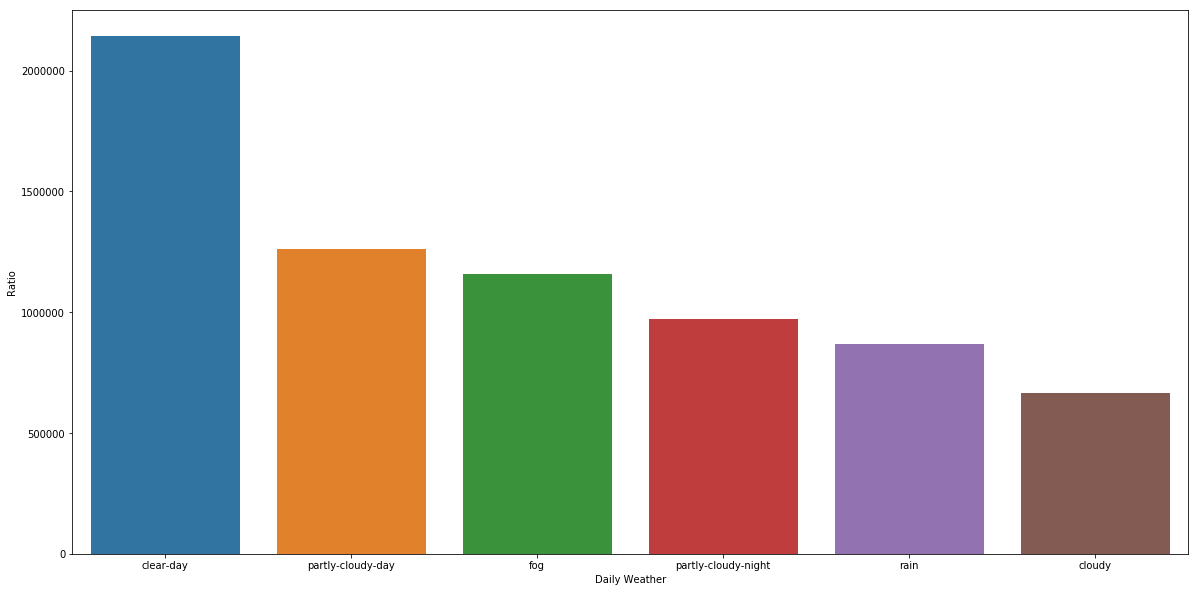

In [187]:
plt.figure(figsize=(20,10))

sns.barplot(x="Daily Weather", y="Ratio", data=f)
